# Setup

## Install library

In [ ]:
!pip install sastrawi
!pip install swifter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 12.4 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=d7e26b0f9d0db8f1bfa18539248c7f3984fa63cf5e9f3ada652751bc44046f5f
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


## Import library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import swifter
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import shutil
from google.colab import drive, files

# Load Dataset & Exploratory Data Analysis

## Import dataset from GitHub

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/tantowjy/news-classification/main/dataset/talas/dataset-training-talas-830.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    833 non-null    object 
 1   link                     833 non-null    object 
 2   date                     492 non-null    object 
 3   content                  833 non-null    object 
 4   liberalism_conservative  833 non-null    int64  
 5   coalition_opposition     492 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 39.2+ KB


,title,link,date,content,liberalism_conservative,coalition_opposition
0,Wapres Harap Bendungan Cipanas Berkembang Jadi...,https://nasional.kompas.com/read/2024/07/09/20...,2024-07-09 00:00:00,Wakil Presiden (Wapres) RI Ma'ruf Amin berhara...,0,1.0
1,Mahasiswa Dikhawatirkan Terlilit Utang Jika Ba...,https://nasional.kompas.com/read/2024/07/09/20...,2024-07-09 00:00:00,Gagasan Menteri Koordinator Pembangunan Manusi...,1,0.0
2,Airlangga Nilai KPU Masih Layak Selenggarakan ...,https://nasional.kompas.com/read/2024/07/09/20...,2024-07-09 00:00:00,Ketua Umum Partai Golkar Airlangga Hartarto me...,0,1.0
3,Pakar Ragu Rencana Datangkan Dokter Asing Bisa...,https://nasional.kompas.com/read/2024/07/09/19...,2024-07-09 00:00:00,Rencana pemerintah mendatangkan dokter asing u...,1,0.0
4,Usul Muhadjir Pakai Pinjol Buat Bayar Uang Kul...,https://nasional.kompas.com/read/2024/07/09/19...,2024-07-09 00:00:00,Usul Menteri Koordinator Pembangunan Manusia d...,1,0.0
...,...,...,...,...,...,...
828,Maraknya Video Mesum Akibat Ketidaktegasan Pem...,https://www.antaranews.com/berita/208502/hti-m...,NaN,"hizbut tahrir indonesia (hti) menilai, marakny...",1,NaN
829,Harus Jadi Basis Penyelenggaraan Pemerintahan,https://www.antaranews.com/berita/206065/panca...,NaN,sehubungan peringatan hari lahir pancasila 1 j...,1,NaN
830,: Indonesia Harus Perkuat Ideologi Kebangsaan,https://www.antaranews.com/berita/181310/fpn-i...,NaN,bangsa indonesia harus mampu memperkuat ideolo...,1,NaN
831,Kiemas Ingin Parpol Nasionalis Bergabung,https://www.antaranews.com/berita/178711/taufi...,NaN,ketua presidium pusat persatuan alumni (ppa) g...,1,NaN


In [ ]:
# change label number to int
df['liberalism_conservative'] = df['liberalism_conservative'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    833 non-null    object 
 1   link                     833 non-null    object 
 2   date                     492 non-null    object 
 3   content                  833 non-null    object 
 4   liberalism_conservative  833 non-null    int64  
 5   coalition_opposition     492 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 39.2+ KB


## Exploratory Data Analysis

### Missing values

In [ ]:
df.isna().sum()

title                        0
link                         0
date                       341
content                      0
liberalism_conservative      0
coalition_opposition       341
dtype: int64

In [ ]:
df = df.dropna(subset=['liberalism_conservative'])

### Class distribution

In [ ]:
liberalism = (df['liberalism_conservative'] == 1).sum()
conservative = (df['liberalism_conservative'] == 0).sum()

print(liberalism)
print(conservative)

450
383


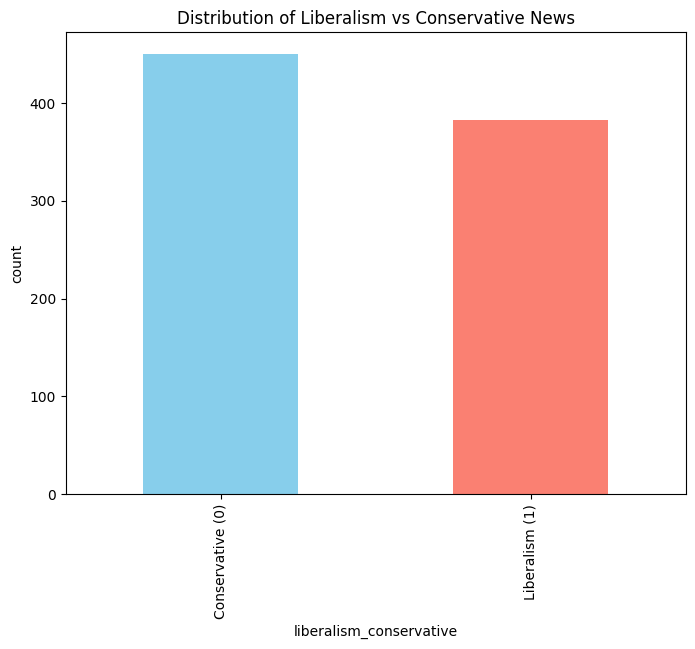

In [ ]:
# count the occurrences of each class in 'is_fake'
count_classes = df['liberalism_conservative'].value_counts()

# plot the distribution as a bar chart
plt.figure(figsize=(8, 6))
count_classes.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Liberalism vs Conservative News')
plt.xlabel('liberalism_conservative')
plt.ylabel('count')
plt.xticks(ticks=[0, 1], labels=['Conservative (0)', 'Liberalism (1)'])
plt.show()

### Median and mean word count


In [ ]:
# add a column for the word count
df['text'] = df['title'] + ' ' + df['content']
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# calculate the median word count for each label
median_word_count_label_0 = df[df['liberalism_conservative'] == 0]['word_count'].median()
median_word_count_label_1 = df[df['liberalism_conservative'] == 1]['word_count'].median()

median_word_count_label_0, median_word_count_label_1

(332.0, 369.5)

In [ ]:
# calculate the median word count for each label
mean_word_count_label_0 = df[df['liberalism_conservative'] == 0]['word_count'].mean()
mean_word_count_label_1 = df[df['liberalism_conservative'] == 1]['word_count'].mean()

mean_word_count_label_0, mean_word_count_label_1

(344.08616187989554, 422.8022222222222)

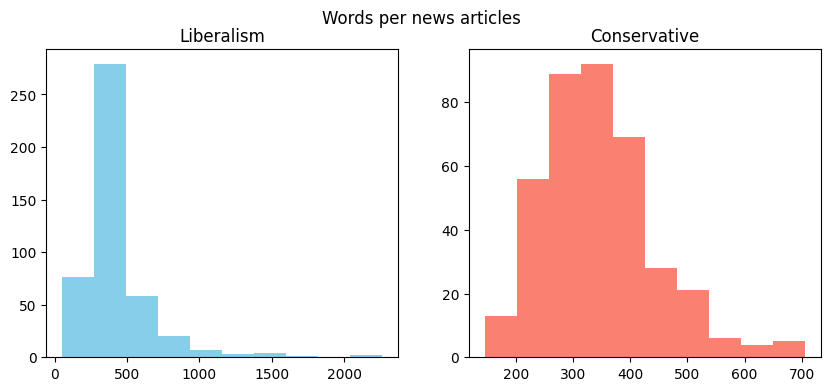

In [ ]:
# plot word count
fig, (libr, cons) = plt.subplots(1, 2, figsize=(10, 4))

libr_words = df[df['liberalism_conservative'] == 1]['word_count']
cons_words = df[df['liberalism_conservative'] == 0]['word_count']

libr.hist(libr_words, color='skyblue')
cons.hist(cons_words, color='salmon')

libr.set_title('Liberalism')
cons.set_title('Conservative')

fig.suptitle('Words per news articles')
plt.show()

# Data Preprocessing

## Stopword removal and lemmatization

In [ ]:
# create sastrawi stopword
stopword_factory = StopWordRemoverFactory()
stopword = stopword_factory.create_stop_word_remover()

# create sastrawi stemmer
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

In [ ]:
# functions for cleaning, removing stopwords
def preprocess_text(text):
    text = str(text)

    # change text to lowercase
    text = text.lower()

    # change link with http/https patterns
    text = re.sub(r'http\S+', '', text)

    # remove hashtag and username
    text = re.sub(r'(@\w+|#\w+)', '', text)

    # remove character other than a-z and A-Z
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # replace new line '\n' with space
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\t', ' ', text)

    # remove stopword with sastrawi library
    text = stopword.remove(text)

    # do stemming with sastrawi library
    text = stemmer.stem(text)

    # removing more than one space
    text = re.sub(r'\s{2,}', ' ', text)

    return text

In [ ]:
# text preprocessing
df['text'] = df['text'].swifter.apply(preprocess_text)

Pandas Apply:   0%|          | 0/833 [00:00<?, ?it/s]

## Save text preprocessing result

In [ ]:
# save data preprocessing result
df.to_csv("dataset-talas-preprocess-830.csv", index=False)
df.to_json("dataset-talas-preprocess-830.json")

In [ ]:
files.download("dataset-talas-preprocess-830.csv")
files.download("dataset-talas-preprocess-830.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_json("https://raw.githubusercontent.com/tantowjy/news-classification/main/dataset/talas-preprocessing/dataset-talas-preprocess-830.json")

## Check median and mean word count after preprocessing

In [ ]:
# add a column for the word count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# calculate the median word count for each label
median_word_count_label_0 = df[df['liberalism_conservative'] == 0]['word_count'].median()
median_word_count_label_1 = df[df['liberalism_conservative'] == 1]['word_count'].median()

median_word_count_label_0, median_word_count_label_1

(269.0, 287.0)

In [ ]:
# calculate the median word count for each label
mean_word_count_label_0 = df[df['liberalism_conservative'] == 0]['word_count'].mean()
mean_word_count_label_1 = df[df['liberalism_conservative'] == 1]['word_count'].mean()

mean_word_count_label_0, mean_word_count_label_1

(277.23498694516974, 329.5711111111111)

# Create Model Liberalism vs Conservative

## Split the datasets

In [ ]:
# separating features and labels
X = df['text'].values
y = df['liberalism_conservative'].values

In [ ]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline model with Scikit-Learn

Logistic Regression: 0.85
Support Vector Machine: 0.88
K-Nearest Neighbors: 0.80
Decision Tree: 0.82
Random Forest: 0.89
Gradient Boosting: 0.89


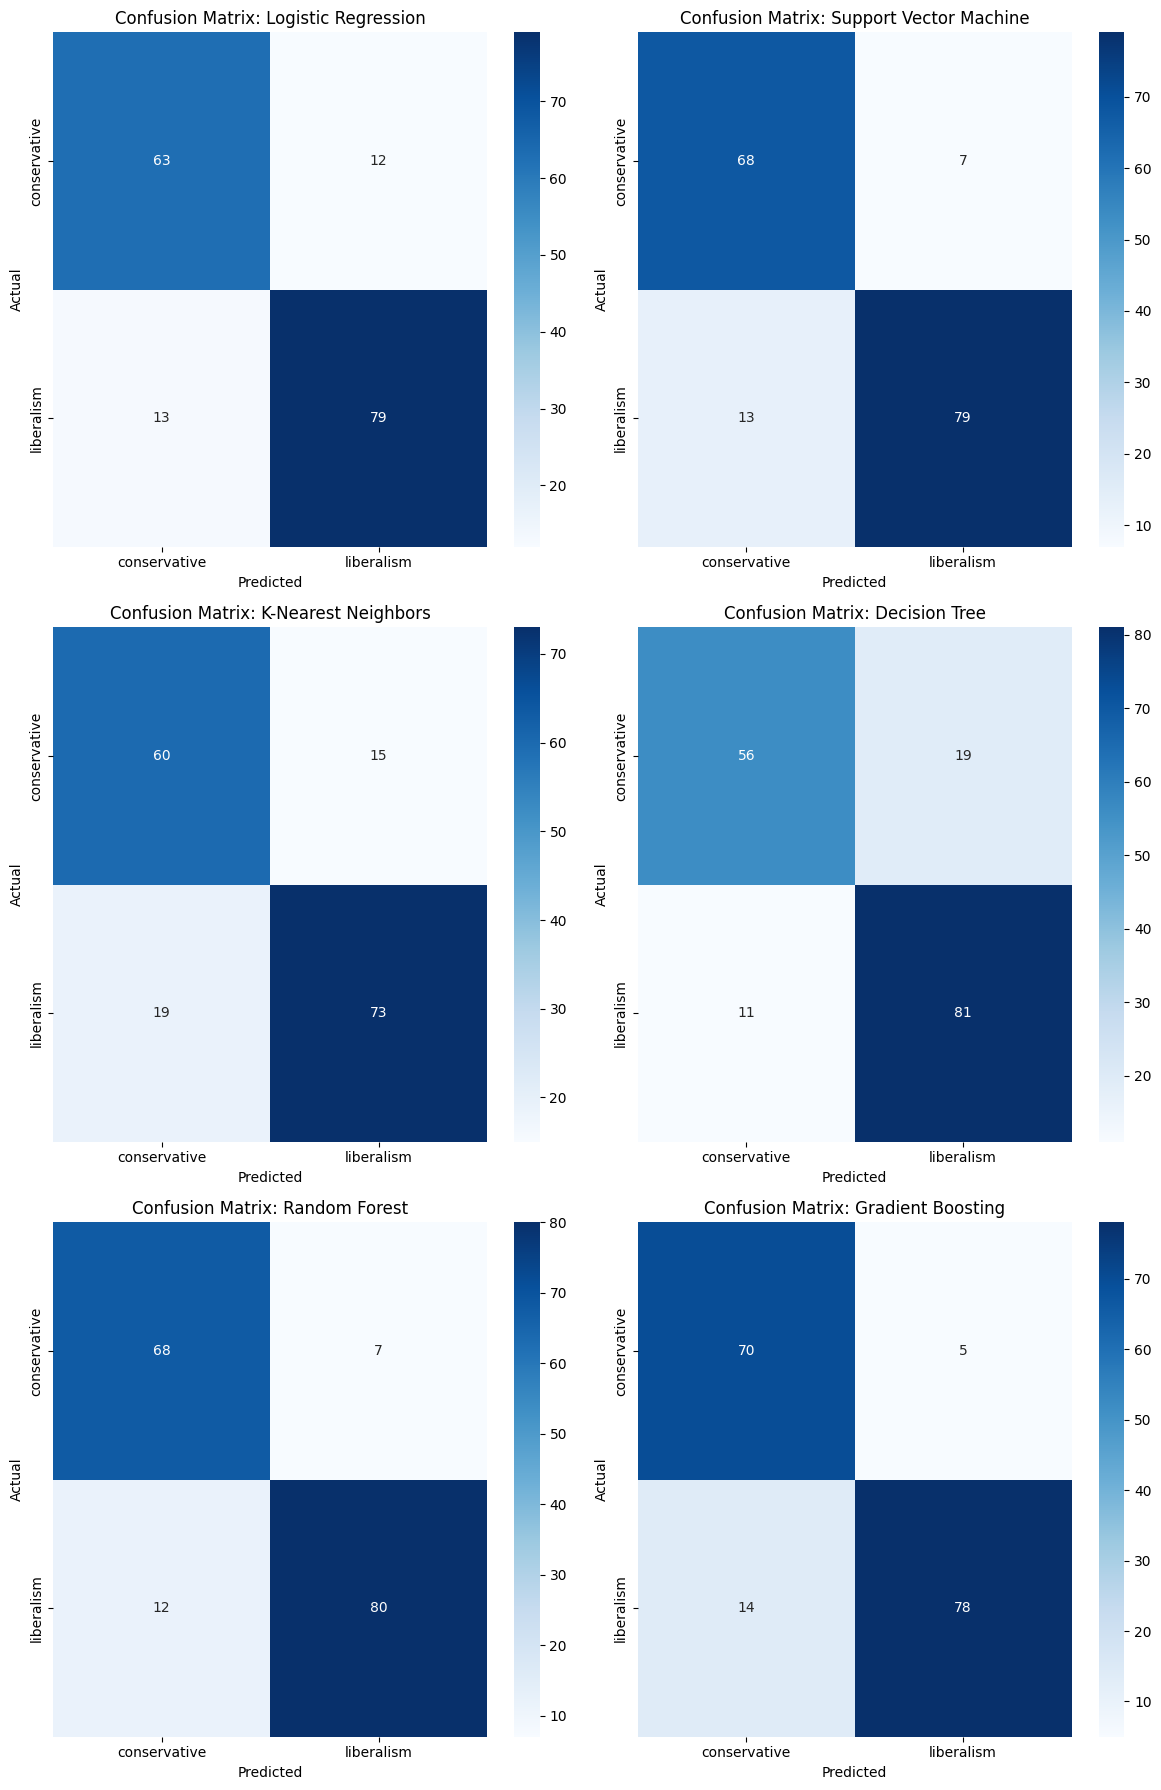

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# create a pipeline for each classifier
pipelines = {name: Pipeline([('tfidf', TfidfVectorizer()), ('clf', clf)]) for name, clf in classifiers.items()}

# train and evaluate classifiers
n_classifiers = len(pipelines)
n_cols = 2
n_rows = (n_classifiers + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6*n_rows))
axes = axes.flatten()

for idx, (name, pipeline) in enumerate(pipelines.items()):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy:.2f}")

    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['conservative', 'liberalism'], yticklabels=['conservative', 'liberalism'], ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix: {name}")
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# hide any remaining empty subplots
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Create Tokenizer

In [ ]:
vocab_size = 10000
char_vocab_size = 50
embedding_dim = 128
char_embedding_dim = 50
max_length = 100
max_char_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [ ]:
# Create tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

# Converting text to numeric squences
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding the squences
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Create tokenizer for characters
char_tokenizer = Tokenizer(char_level=True)
char_tokenizer.fit_on_texts(X_train)

# Converting text to numeric sequences of characters
train_char_sequences = char_tokenizer.texts_to_sequences(X_train)
test_char_sequences = char_tokenizer.texts_to_sequences(X_test)

# Padding the sequences
padded_train_char_sequences = pad_sequences(train_char_sequences, maxlen=max_char_length, padding=padding_type, truncating=trunc_type)
padded_test_char_sequences = pad_sequences(test_char_sequences, maxlen=max_char_length, padding=padding_type, truncating=trunc_type)

# Ensure input shapes are tensors
padded_train_sequences = tf.constant(padded_train_sequences)
padded_test_sequences = tf.constant(padded_test_sequences)
padded_train_char_sequences = tf.constant(padded_train_char_sequences)
padded_test_char_sequences = tf.constant(padded_test_char_sequences)

## Import library

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.layers import GlobalAveragePooling1D, BatchNormalization, MaxPooling1D
from tensorflow.keras.layers import Flatten, GlobalMaxPool1D, SpatialDropout1D, Conv1D
from tensorflow.keras.layers import Input, Concatenate, Attention, Reshape, Layer, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2, l1_l2

## Model A

In [ ]:
# create model A
model_A = Sequential()
model_A.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model_A.add(GlobalAveragePooling1D())
model_A.add(Dense(24, activation='relu'))
model_A.add(BatchNormalization())
model_A.add(Dropout(0.3))
model_A.add(Dense(8, activation='relu'))
model_A.add(Dropout(0.3))
model_A.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile model
model_A.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# model training
history = model_A.fit(padded_train_sequences, y_train,
                      epochs=300,
                      validation_data=(padded_test_sequences, y_test),
                      batch_size=64,
                      callbacks=[early_stopping])

Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5051 - loss: 0.6902 - val_accuracy: 0.5629 - val_loss: 0.6918
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6078 - loss: 0.6626 - val_accuracy: 0.5509 - val_loss: 0.6904
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6167 - loss: 0.6483 - val_accuracy: 0.5509 - val_loss: 0.6891
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6567 - loss: 0.6266 - val_accuracy: 0.5509 - val_loss: 0.6874
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6660 - loss: 0.6145 - val_accuracy: 0.5509 - val_loss: 0.6856
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6649 - loss: 0.5969 - val_accuracy: 0.5509 - val_loss: 0.6834
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6901 - loss: 0.5777 - val_accuracy: 0.5569 - val_loss: 0.6810
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7052 - loss: 0.5600 - val_accuracy: 0.

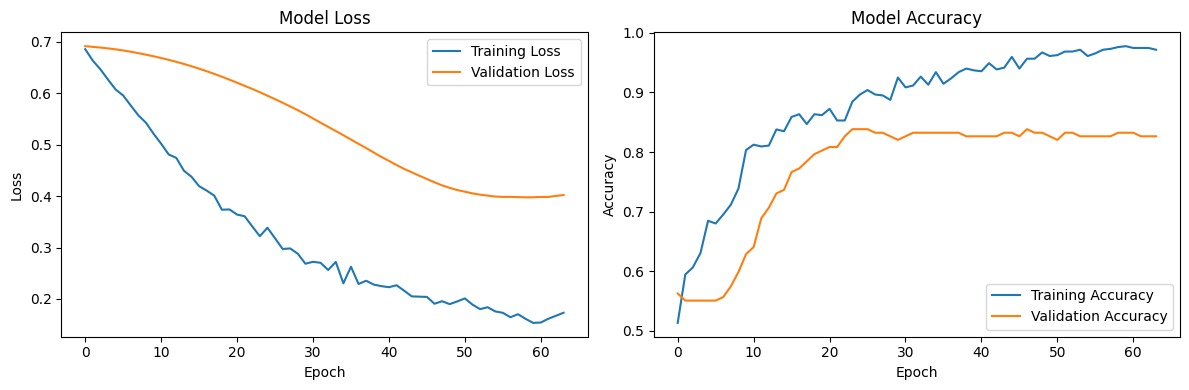

In [ ]:
# training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Evaluate and save model

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8344 - loss: 0.3789 
Test Accuracy: 83.23%
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


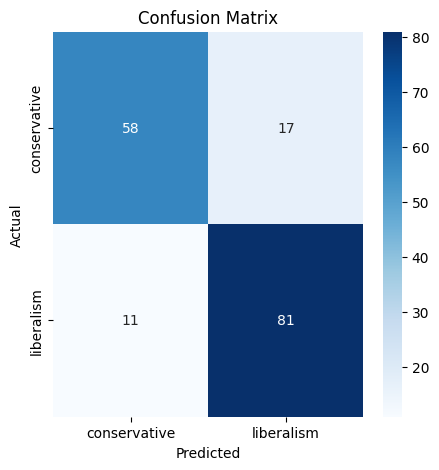

In [ ]:
import pickle

# Evaluate the model
loss, accuracy = model_A.evaluate(padded_test_sequences, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

y_pred_prob = model_A.predict(padded_test_sequences)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['conservative','liberalism'], yticklabels=['conservative','liberalism'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model with HDF5 format
model_A.save('liberalism_conservative_A.h5')

# Save the model with pickle format
with open('tokenizer_liberalism_conservative_A.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

### Convert to TFLite

In [ ]:
# Convert the model with Select TF ops
converter = tf.lite.TFLiteConverter.from_keras_model(model_A)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the model
with open('liberalism_conservative_A.tflite', 'wb') as f:
    f.write(tflite_model)

print('Model has been saved as TensorFlow Lite format.')

Saved artifact at '/tmp/tmp3xuagq2s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137422983185680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422984412704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983194128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983472832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983475648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983463856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983469312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983467200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983679664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983464208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983687056: Tenso

## Fine Tune Model A

In [ ]:
!wget https://github.com/tantowjy/news-classification/blob/main/model-weight/liberalism_conservative_240713/liberalism_conservative_A.h5

--2024-08-07 12:11:01--  https://github.com/tantowjy/news-classification/blob/main/model-weight/liberalism_conservative_240713/liberalism_conservative_A.h5
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘liberalism_conservative_A.h5.1’

liberalism_conserva     [ <=>                ] 290.85K  --.-KB/s    in 0.05s   

2024-08-07 12:11:01 (5.34 MB/s) - ‘liberalism_conservative_A.h5.1’ saved [297834]



In [ ]:
from tensorflow.keras.models import load_model
model_A_fine = load_model('liberalism_conservative_A.h5')

model_A_fine.pop()

model_A_fine.add(Dense(8, activation='relu'))
# model_A_fine.add(BatchNormalization())
# model_A_fine.add(Dropout(0.35))
# model_A_fine.add(Dense(10, activation='relu'))
model_A_fine.add(Dropout(0.35))
model_A_fine.add(Dense(1, activation='sigmoid'))

model_A_fine.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_A_fine.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 24)                  │           3,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,283,473 (4.90 MB)

 Trainable params: 1,283,425 (4.90 MB)

 Non-trainable params: 48 (192.00 B)

In [ ]:
# compile model
model_A_fine.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# model training
history = model_A_fine.fit(padded_train_sequences, y_train,
                      epochs=500,
                      validation_data=(padded_test_sequences, y_test),
                      batch_size=64,
                      callbacks=[early_stopping])

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.4212 - loss: 1.3712 - val_accuracy: 0.4491 - val_loss: 1.0540
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3630 - loss: 1.4148 - val_accuracy: 0.4491 - val_loss: 1.0294
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3589 - loss: 1.3368 - val_accuracy: 0.4371 - val_loss: 1.0026
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4504 - loss: 1.1189 - val_accuracy: 0.4431 - val_loss: 0.9719
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4388 - loss: 1.0888 - val_accuracy: 0.4431 - val_loss: 0.9351
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4232 - loss: 1.0381 - val_accuracy: 0.4431 - val_loss: 0.8979
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4273 - loss: 0.9915 - val_accuracy: 0.4491 - val_loss: 0.8587
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4783 - loss: 0.8379 - val_accuracy: 0.

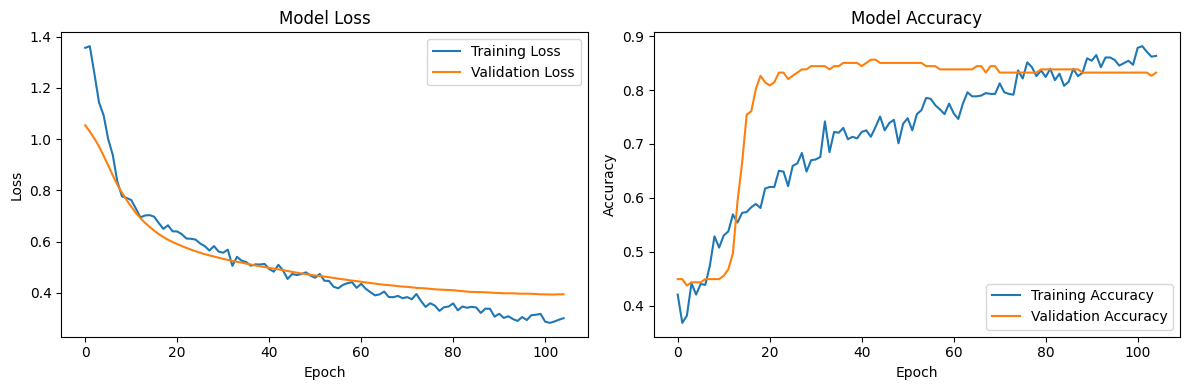

In [ ]:
# training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Evaluate and save model

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8366 - loss: 0.3781 
Test Accuracy: 83.23%
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Classification Report:
              precision    recall  f1-score   support

conservative       0.84      0.77      0.81        75
  liberalism       0.83      0.88      0.85        92

    accuracy                           0.83       167
   macro avg       0.83      0.83      0.83       167
weighted avg       0.83      0.83      0.83       167



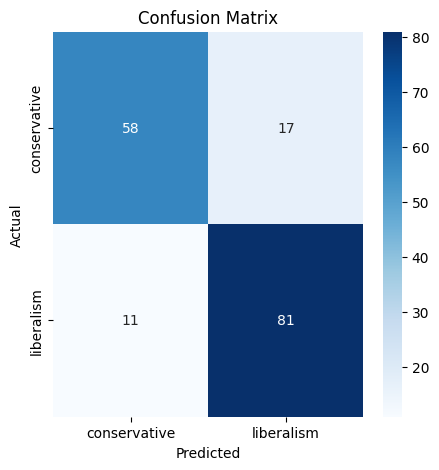

In [ ]:
import pickle

# Evaluate the model
loss, accuracy = model_A_fine.evaluate(padded_test_sequences, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

y_pred_prob = model_A_fine.predict(padded_test_sequences)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print classification report
print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=['conservative', 'liberalism'])
print(report)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['conservative','liberalism'], yticklabels=['conservative','liberalism'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model with HDF5 format
model_A_fine.save('liberalism_conservative_A_fine.h5')

# Save the model with pickle format
with open('tokenizer_liberalism_conservative_A_fine.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

### Convert to TFLite

In [ ]:
# Convert the model with Select TF ops
converter = tf.lite.TFLiteConverter.from_keras_model(model_A)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the model
with open('liberalism_conservative_A_fine.tflite', 'wb') as f:
    f.write(tflite_model)

print('Model has been saved as TensorFlow Lite format.')

Saved artifact at '/tmp/tmpypqsxpbk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137422983185680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422984412704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983194128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983472832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983475648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983463856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983469312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983467200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983679664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983464208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983687056: Tenso

## Model B (LSTM)

In [ ]:
# create model B
# model_B = Sequential()
# model_B.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
# model_B.add(Bidirectional(LSTM(24, return_sequences=True)))
# # model_B.add(Dropout(0.3))
# model_B.add(GlobalMaxPool1D())
# # model_B.add(Bidirectional(LSTM(8)))
# # model_B.add(Dropout(0.3))
# model_B.add(Dense(16, activation='relu'))
# model_B.add(BatchNormalization())
# # model_B.add(Dropout(0.3))
# model_B.add(Dense(6, activation='relu'))
# # model_B.add(Dropout(0.3))
# model_B.add(Dense(1, activation='sigmoid'))

# model_B.summary()

model_B = Sequential()
model_B.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model_B.add(Bidirectional(LSTM(24, return_sequences=True)))
model_B.add(Dropout(0.3))
model_B.add(GlobalMaxPool1D())
model_B.add(Dense(16, activation='relu', kernel_regularizer=l2(l2=0.001)))
model_B.add(BatchNormalization())
model_B.add(Dense(6, activation='relu'))
model_B.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile model
model_B.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# model training
history = model_B.fit(padded_train_sequences, y_train,
                      epochs=300,
                      validation_data=(padded_test_sequences, y_test),
                      batch_size=64,
                      callbacks=[early_stopping])

Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.5763 - loss: 0.7084 - val_accuracy: 0.5509 - val_loss: 0.7155
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.7407 - loss: 0.6614 - val_accuracy: 0.5569 - val_loss: 0.7150
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.8306 - loss: 0.6213 - val_accuracy: 0.6168 - val_loss: 0.7140
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.8775 - loss: 0.5911 - val_accuracy: 0.6527 - val_loss: 0.7126
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - accuracy: 0.9099 - loss: 0.5600 - val_accuracy: 0.7186 - val_loss: 0.7108
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.9262 - loss: 0.5362 - val_accuracy: 0.7904 - val_loss: 0.7091
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.9393 - loss: 0.5107 - val_accuracy: 0.8144 - val_loss: 0.7072
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.9480 - loss: 0.4879 - val_acc

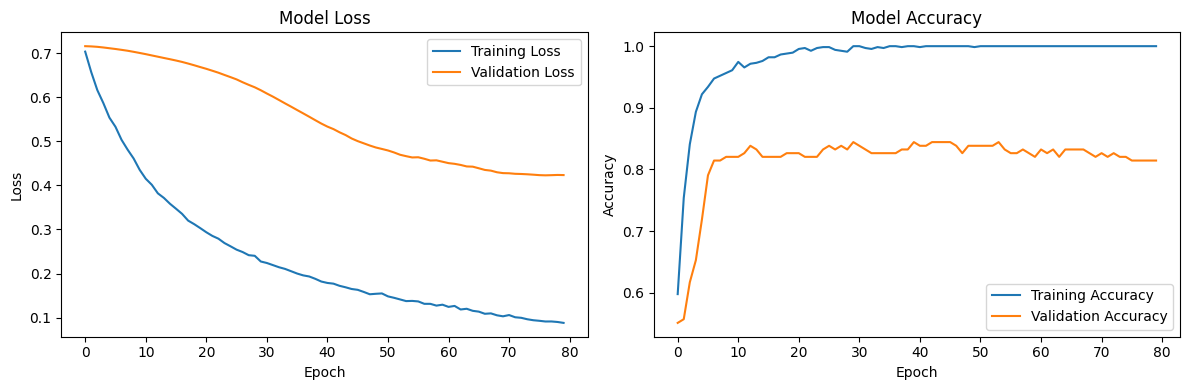

In [ ]:
# training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Evaluate and save model

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8056 - loss: 0.4290
Test Accuracy: 81.44%


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step


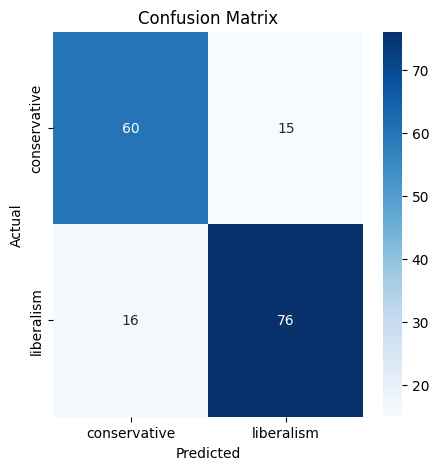

In [ ]:
import pickle

# Evaluate the model
loss, accuracy = model_B.evaluate(padded_test_sequences, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

y_pred_prob = model_B.predict(padded_test_sequences)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['conservative','liberalism'], yticklabels=['conservative','liberalism'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model with HDF5 format
model_B.save('liberalism_conservative_B.h5')

# Save the model with pickle format
with open('tokenizer_liberalism_conservative_B.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

### Convert to TFLite

In [ ]:
# Convert the model with Select TF ops
converter = tf.lite.TFLiteConverter.from_keras_model(model_B)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the model
with open('liberalism_conservative_B.tflite', 'wb') as f:
    f.write(tflite_model)

print('Model has been saved as TensorFlow Lite format.')

Saved artifact at '/tmp/tmpnzoav23z'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100), dtype=tf.float32, name='keras_tensor_79')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137422647740016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422647742480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422647754096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422647752160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422647938736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422647948064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422647943488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422647950880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422647743360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422648260064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422648447344: Te

## Model C

In [ ]:
# create model C

# Custom Layer for Tiling
class TileLayer(Layer):
    def __init__(self, **kwargs):
        super(TileLayer, self).__init__(**kwargs)

    def call(self, inputs):
        return tf.tile(inputs, [1, max_length, 1])

# Word Embedding Layer
word_input = Input(shape=(max_length,))
word_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(word_input)

# Character Embedding Layer
char_input = Input(shape=(max_char_length,))
char_embedding = Embedding(input_dim=char_vocab_size, output_dim=char_embedding_dim)(char_input)
char_cnn = Conv1D(filters=100, kernel_size=3, padding='same', activation='relu')(char_embedding)
char_pooling = GlobalMaxPool1D()(char_cnn)

# Reshape char_pooling to match word_embedding
char_pooling_reshaped = Reshape((1, -1))(char_pooling)
char_pooling_repeated = TileLayer()(char_pooling_reshaped)

# Combine Word and Character Embeddings
merged_embedding = Concatenate()([word_embedding, char_pooling_repeated])

# BiLSTM Layer
bilstm = Bidirectional(LSTM(24, return_sequences=True))(merged_embedding)

# Attention Layer
attention = Attention()([bilstm, bilstm])
attention_pooling = GlobalAveragePooling1D()(attention)

# Fully Connected Layers
fc1 = Dense(8, activation='relu')(attention_pooling)
dropout = Dropout(0.3)(fc1)
output = Dense(1, activation='sigmoid')(dropout)

# Create and Compile Model
model_C = Model(inputs=[word_input, char_input], outputs=output)
model_C.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print Model Summary
model_C.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 200)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 200, 50)        │          2,500 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 200, 100)       │         15,100 │ embedding_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_2    │ (None, 100)            │              0 │ conv1d_1[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_4             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 1, 100)         │              0 │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 100, 128)       │      1,280,000 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ tile_layer_1 (TileLayer)  │ (None, 100, 100)       │              0 │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 100, 228)       │              0 │ embedding_4[0][0],     │
│ (Concatenate)             │                        │                │ tile_layer_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 100, 48)        │         48,576 │ concatenate_1[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_1 (Attention)   │ (None, 100, 48)        │              0 │ bidirectional_2[0][0], │
│                           │                        │                │ bidirectional_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 48)             │              0 │ attention_1[0][0]      │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 8)              │            392 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 8)              │              0 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 1)              │              9 │ dropout_5[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,346,577 (5.14 MB)

 Trainable params: 1,346,577 (5.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile model
model_C.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# model training
history = model_C.fit([padded_train_sequences, padded_train_char_sequences], y_train,
                      epochs=300,
                      validation_data=([padded_test_sequences, padded_test_char_sequences], y_test),
                      batch_size=64,
                      callbacks=[early_stopping])

Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 241ms/step - accuracy: 0.5009 - loss: 0.6937 - val_accuracy: 0.5808 - val_loss: 0.6917
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 328ms/step - accuracy: 0.5650 - loss: 0.6905 - val_accuracy: 0.5569 - val_loss: 0.6894
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.5330 - loss: 0.6877 - val_accuracy: 0.6048 - val_loss: 0.6868
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.5452 - loss: 0.6849 - val_accuracy: 0.5629 - val_loss: 0.6834
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.5389 - loss: 0.6840 - val_accuracy: 0.6347 - val_loss: 0.6796
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.6191 - loss: 0.6755 - val_accuracy: 0.7126 - val_loss: 0.6743
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 332ms/step - accuracy: 0.6698 - loss: 0.6715 - val_accuracy: 0.7725 - val_loss: 0.6680
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - accuracy: 0.7491 - loss: 0.6599 - val_acc

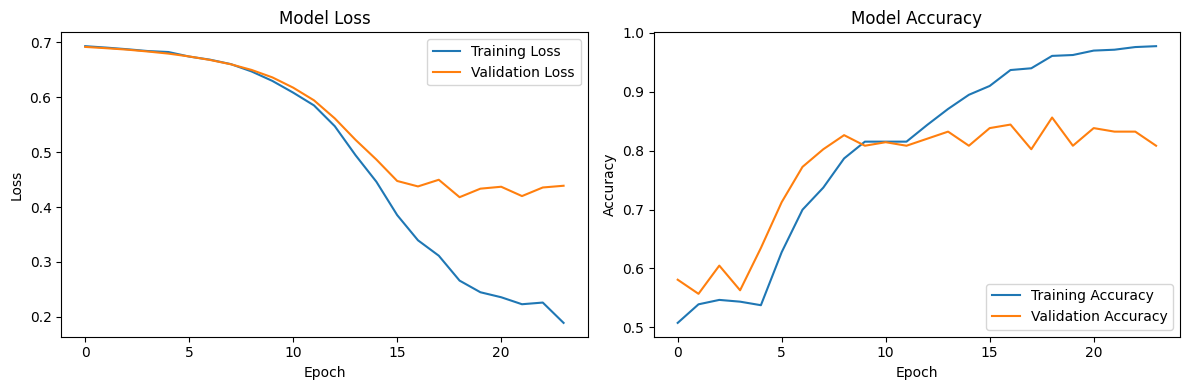

In [ ]:
# training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Evaluate and save model

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8649 - loss: 0.4016
Test Accuracy: 85.63%


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step


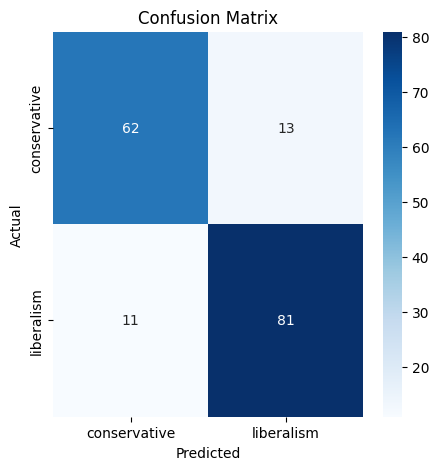

In [ ]:
import pickle

# Evaluate the model
loss, accuracy = model_C.evaluate([padded_test_sequences, padded_test_char_sequences], y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

y_pred_prob = model_C.predict([padded_test_sequences, padded_test_char_sequences])
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['conservative','liberalism'], yticklabels=['conservative','liberalism'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model with HDF5 format
model_C.save('liberalism_conservative_C.h5')

# Save the model with pickle format
with open('tokenizer_liberalism_conservative_C.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

### Convert to TFLite

In [ ]:
# Convert the model with Select TF ops
converter = tf.lite.TFLiteConverter.from_keras_model(model_A)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the model
with open('liberalism_conservative_C.tflite', 'wb') as f:
    f.write(tflite_model)

print('Model has been saved as TensorFlow Lite format.')

Saved artifact at '/tmp/tmpuhtii1ka'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137422983185680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422984412704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983194128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983472832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983475648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983463856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983469312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983467200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983679664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983464208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137422983687056: Tenso

# Download model

In [ ]:
files.download("liberalism_conservative_A.tflite")
files.download("liberalism_conservative_A.h5")
files.download("liberalism_conservative_B.tflite")
files.download("liberalism_conservative_B.h5")
files.download("liberalism_conservative_C.tflite")
files.download("liberalism_conservative_C.h5")
files.download("tokenizer_liberalism_conservative_A.pkl")
files.download("tokenizer_liberalism_conservative_B.pkl")
files.download("tokenizer_liberalism_conservative_C.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Testing

In [ ]:
import pickle
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences

# Load tokenizer from pickle file
with open('tokenizer_C2.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path='hoax_detection_C2.tflite')
interpreter.allocate_tensors()

# Get input and output tensor information
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# news you want to predict
#news_text = ["Ketua Umum Partai Gerindra Prabowo Subianto mempromosikan produk sprei. Dalam video tersebut, Prabowo mengatakan akan membagikan ribuan sprei karena berhasil menang satu putaran dalam Pemilihan Presiden (Pilpres) 2024."]
#news_text = ["Dewan Kehormatan Penyelenggara Pemilu (DKPP) belum menjadwalkan sidang terhadap aduan soal dugaan perbuatan asusila oleh Ketua KPU RI Hasyim Asy'ari terhadap anggota Panitia Pemilihan Luar Negeri (PPLN) yang bertugas di Eropa."]
#news_text = ["Serangan Israel ini menewaskan puluhan warga, termasuk anak-anak. Meskipun sudah berkali-kali saya sampaikan, tapi saya ingin mengulang lagi bahwa Indonesia mengecam keras serangan Israel ke Rafah"]
#news_text = ["Penggalian Jalan Tol di daerah Jawa Timur mengeluarkan Minyak Mentah dengan potensi yang cukup besar"]
#news_text = ["Bendungan Sepaku Semoi di Kabupaten Penajam Paser Utara akan memasok air baku untuk IKN sebesar 2.000 liter per detik."]
#news_text = ["Presiden Joko Widodo atau Jokowi mengecam keras serangan Israel ke Kota Rafah, Gaza Selatan, Palestina. Serangan Israel ini menewaskan puluhan warga, termasuk anak-anak. Meskipun sudah berkali-kali saya sampaikan, tapi saya ingin mengulang lagi bahwa Indonesia mengecam keras serangan Israel ke Rafah kata Jokowi di Kota Dumai, Riau, Sabtu (1/6/2024). Dia meminta Israel untuk menataati perintah dari Mahkamah Internasional. Termasuk, menghentikan serangan ke Kota Rafah, Gaza, Palestina. Dan Israel mestinya memiliki kewajiban untuk mentaati mahkamah internasional, termasuk penghentian serangan ke Palestina jelasnya. "]
news_text = ["Dishub bekerja sama dengan Polri akan menggelar razia kendaraan yang mati pajak, bagi kendaraan yang telat membayar pajak selama 3 tahun atau lebih, kendaraan akan langsung ditahan. Pada pesan tersebut juga menyertakan jadwal razia yang akan dilakukan. Bagi kendaraan yang telat bayar pajak. Berdasarkan data, ada ratusan ribu motor dan mobil yang belum bayar pajak yang masih menggunakan pelat lama. Bagi kendaraan yang telat bayar pajak 3 tahun atau lebih akan langsung dikandangin."]

# Tokenization and padding of news
new_sequences = tokenizer.texts_to_sequences(news_text)
max_len = 100  # Make sure the maximum length matches the one used when training the model
new_padded = pad_sequences(new_sequences, maxlen=max_len)

# Convert input data to float32 type
new_padded = new_padded.astype('float32')

# Set the input tensor with compacted data
interpreter.set_tensor(input_details[0]['index'], new_padded)

# Run the interpreter to make predictions
interpreter.invoke()

# Get the prediction result from the output tensor
predictions_tflite = interpreter.get_tensor(output_details[0]['index'])

# Interpreting prediction results
predicted_labels_tflite = [1 if pred > 0.5 else 0 for pred in predictions_tflite]

# Show the prediction result
for text, pred, label in zip(news_text, predictions_tflite, predicted_labels_tflite):
    print(f'Text: {text}')
    print(f'Prediction: {pred[0]:.4f}')
    print(f'Predicted Label: {"Hoax" if label == 1 else "Not Hoax"}')

Text: Dishub bekerja sama dengan Polri akan menggelar razia kendaraan yang mati pajak, bagi kendaraan yang telat membayar pajak selama 3 tahun atau lebih, kendaraan akan langsung ditahan. Pada pesan tersebut juga menyertakan jadwal razia yang akan dilakukan. Bagi kendaraan yang telat bayar pajak. Berdasarkan data, ada ratusan ribu motor dan mobil yang belum bayar pajak yang masih menggunakan pelat lama. Bagi kendaraan yang telat bayar pajak 3 tahun atau lebih akan langsung dikandangin.
Prediction: 0.8528
Predicted Label: Hoax
